In [1]:
import requests
import pandas as pd
import datetime as dt
import subprocess
import json
import os
import re
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
keys = open('keys.txt')
read_list = keys.readlines()
for i in range(len(read_list)):
    text = read_list[i]
    read_list[i] = text.rstrip()
user, token = read_list

In [9]:
auth = user + ':' + token
url = 'https://api.github.com/repos/movidius/ncappzoo/traffic/clones'

In [10]:
today_dt = dt.datetime.today()
today = '_'.join(str(today_dt).split(' '))
today = '-'.join(str(today.split('.')[0]).split(':'))
folder_name = 'ncappzoo_clones_' + today
file_name = folder_name + '/' + 'ncappzoo_clones_' + today

os.mkdir(folder_name)
test = subprocess.Popen(["curl", "-u", auth, url, ">", file_name], stdout=subprocess.PIPE)
out, err = test.communicate()
decoded_string = out.decode("utf-8").replace("'", '""').replace('\n', '')
data = json.loads(decoded_string)
data

{'count': 342,
 'uniques': 214,
 'clones': [{'timestamp': '2019-10-06T00:00:00Z', 'count': 15, 'uniques': 13},
  {'timestamp': '2019-10-07T00:00:00Z', 'count': 18, 'uniques': 12},
  {'timestamp': '2019-10-08T00:00:00Z', 'count': 28, 'uniques': 17},
  {'timestamp': '2019-10-09T00:00:00Z', 'count': 21, 'uniques': 20},
  {'timestamp': '2019-10-10T00:00:00Z', 'count': 21, 'uniques': 19},
  {'timestamp': '2019-10-11T00:00:00Z', 'count': 24, 'uniques': 19},
  {'timestamp': '2019-10-12T00:00:00Z', 'count': 24, 'uniques': 20},
  {'timestamp': '2019-10-13T00:00:00Z', 'count': 21, 'uniques': 14},
  {'timestamp': '2019-10-14T00:00:00Z', 'count': 37, 'uniques': 20},
  {'timestamp': '2019-10-15T00:00:00Z', 'count': 31, 'uniques': 26},
  {'timestamp': '2019-10-16T00:00:00Z', 'count': 26, 'uniques': 24},
  {'timestamp': '2019-10-17T00:00:00Z', 'count': 18, 'uniques': 15},
  {'timestamp': '2019-10-18T00:00:00Z', 'count': 34, 'uniques': 24},
  {'timestamp': '2019-10-19T00:00:00Z', 'count': 24, 'uniques

In [13]:
counts = data['count']
uniques = data['uniques']
timestamp_data = data['clones']

In [14]:
df = pd.DataFrame(timestamp_data)
df

,timestamp,count,uniques
0,2019-10-06T00:00:00Z,15,13
1,2019-10-07T00:00:00Z,18,12
2,2019-10-08T00:00:00Z,28,17
3,2019-10-09T00:00:00Z,21,20
4,2019-10-10T00:00:00Z,21,19
5,2019-10-11T00:00:00Z,24,19
6,2019-10-12T00:00:00Z,24,20
7,2019-10-13T00:00:00Z,21,14
8,2019-10-14T00:00:00Z,37,20
9,2019-10-15T00:00:00Z,31,26


In [15]:
timestamps = [x.split('T')[0] for x in df['timestamp'].values]
df['day'] = [x.split('-')[2] for x in timestamps]
df['mo'] = [x.split('-')[1] for x in timestamps]
df['yr'] = [x.split('-')[0] for x in timestamps]
df['collection_timestamp'] = [today_dt for x in range(len(timestamps))]
df

,timestamp,count,uniques,day,mo,yr,collection_timestamp
0,2019-10-06T00:00:00Z,15,13,06,10,2019,2019-10-19 18:13:53.750785
1,2019-10-07T00:00:00Z,18,12,07,10,2019,2019-10-19 18:13:53.750785
2,2019-10-08T00:00:00Z,28,17,08,10,2019,2019-10-19 18:13:53.750785
3,2019-10-09T00:00:00Z,21,20,09,10,2019,2019-10-19 18:13:53.750785
4,2019-10-10T00:00:00Z,21,19,10,10,2019,2019-10-19 18:13:53.750785
5,2019-10-11T00:00:00Z,24,19,11,10,2019,2019-10-19 18:13:53.750785
6,2019-10-12T00:00:00Z,24,20,12,10,2019,2019-10-19 18:13:53.750785
7,2019-10-13T00:00:00Z,21,14,13,10,2019,2019-10-19 18:13:53.750785
8,2019-10-14T00:00:00Z,37,20,14,10,2019,2019-10-19 18:13:53.750785
9,2019-10-15T00:00:00Z,31,26,15,10,2019,2019-10-19 18:13:53.750785


In [16]:
json_string = json.dumps(data, indent=4, sort_keys=True)
f = open(file_name + '.json', 'a')
f.write(json_string)
f.close()
csv_string = df.to_csv(file_name + '.csv', index=False)

In [131]:
!ls

database_constructor.ipynb	     ncappzoo_views_2019-09-30_10-35-14
database_constructor.py		     ncappzoo_views_2019-10-09_08-23-24
keys.txt			     ncappzoo_views_2019-10-09_12-15-18
master_tables			     ref_master_tables
ncappzoo_clones_2019-09-30_10-35-15  temp
ncappzoo_clones_2019-10-09_12-05-33


In [134]:
file1 = 'ref_master_tables/master_views_table.csv'
old_master = pd.read_csv(file1).drop(columns=['index'])
old_master

,timestamp,count,uniques,day,mo,yr,collection_timestamp
0,2019-09-15T00:00:00Z,75,12,15,9,2019,2019-09-29 10:14:33.792382
1,2019-09-16T00:00:00Z,354,83,16,9,2019,2019-09-29 10:14:33.792382
2,2019-09-17T00:00:00Z,293,66,17,9,2019,2019-09-29 10:14:33.792382
3,2019-09-18T00:00:00Z,280,60,18,9,2019,2019-09-29 10:14:33.792382
4,2019-09-19T00:00:00Z,410,66,19,9,2019,2019-09-29 10:14:33.792382
5,2019-09-20T00:00:00Z,387,71,20,9,2019,2019-09-29 10:14:33.792382
6,2019-09-21T00:00:00Z,213,43,21,9,2019,2019-09-29 10:14:33.792382
7,2019-09-22T00:00:00Z,155,30,22,9,2019,2019-09-29 10:14:33.792382
8,2019-09-23T00:00:00Z,284,71,23,9,2019,2019-09-29 10:14:33.792382
9,2019-09-24T00:00:00Z,467,79,24,9,2019,2019-09-29 10:14:33.792382


In [135]:
file2 = 'ncappzoo_views_2019-10-09_12-15-18/ncappzoo_views_2019-10-09_12-15-18.csv'
new_file = pd.read_csv(file2)
new_file

,timestamp,count,uniques,day,mo,yr,collection_timestamp
0,2019-09-25T00:00:00Z,12,8,25,9,2019,2019-10-09 12:15:18.538986
1,2019-09-26T00:00:00Z,348,61,26,9,2019,2019-10-09 12:15:18.538986
2,2019-09-27T00:00:00Z,320,79,27,9,2019,2019-10-09 12:15:18.538986
3,2019-09-28T00:00:00Z,131,43,28,9,2019,2019-10-09 12:15:18.538986
4,2019-09-29T00:00:00Z,225,53,29,9,2019,2019-10-09 12:15:18.538986
5,2019-09-30T00:00:00Z,351,86,30,9,2019,2019-10-09 12:15:18.538986
6,2019-10-01T00:00:00Z,370,100,1,10,2019,2019-10-09 12:15:18.538986
7,2019-10-02T00:00:00Z,612,102,2,10,2019,2019-10-09 12:15:18.538986
8,2019-10-03T00:00:00Z,413,79,3,10,2019,2019-10-09 12:15:18.538986
9,2019-10-04T00:00:00Z,279,80,4,10,2019,2019-10-09 12:15:18.538986


In [136]:
old_master.append(new_file)

,timestamp,count,uniques,day,mo,yr,collection_timestamp
0,2019-09-15T00:00:00Z,75,12,15,9,2019,2019-09-29 10:14:33.792382
1,2019-09-16T00:00:00Z,354,83,16,9,2019,2019-09-29 10:14:33.792382
2,2019-09-17T00:00:00Z,293,66,17,9,2019,2019-09-29 10:14:33.792382
3,2019-09-18T00:00:00Z,280,60,18,9,2019,2019-09-29 10:14:33.792382
4,2019-09-19T00:00:00Z,410,66,19,9,2019,2019-09-29 10:14:33.792382
5,2019-09-20T00:00:00Z,387,71,20,9,2019,2019-09-29 10:14:33.792382
6,2019-09-21T00:00:00Z,213,43,21,9,2019,2019-09-29 10:14:33.792382
7,2019-09-22T00:00:00Z,155,30,22,9,2019,2019-09-29 10:14:33.792382
8,2019-09-23T00:00:00Z,284,71,23,9,2019,2019-09-29 10:14:33.792382
9,2019-09-24T00:00:00Z,467,79,24,9,2019,2019-09-29 10:14:33.792382


In [137]:
new_master_pseudo = old_master.append(new_file).groupby('timestamp').max().reset_index()
new_master_pseudo

,timestamp,count,uniques,day,mo,yr,collection_timestamp
0,2019-09-15T00:00:00Z,75,12,15,9,2019,2019-09-29 10:14:33.792382
1,2019-09-16T00:00:00Z,354,83,16,9,2019,2019-09-29 10:14:33.792382
2,2019-09-17T00:00:00Z,293,66,17,9,2019,2019-09-29 10:14:33.792382
3,2019-09-18T00:00:00Z,280,60,18,9,2019,2019-09-29 10:14:33.792382
4,2019-09-19T00:00:00Z,410,66,19,9,2019,2019-09-29 10:14:33.792382
5,2019-09-20T00:00:00Z,387,71,20,9,2019,2019-09-29 10:14:33.792382
6,2019-09-21T00:00:00Z,213,43,21,9,2019,2019-09-29 10:14:33.792382
7,2019-09-22T00:00:00Z,155,30,22,9,2019,2019-09-29 10:14:33.792382
8,2019-09-23T00:00:00Z,284,71,23,9,2019,2019-09-29 10:14:33.792382
9,2019-09-24T00:00:00Z,467,79,24,9,2019,2019-09-29 10:14:33.792382


In [138]:
yrs = [x for x in new_master_pseudo['yr'].values]
mos = [x for x in new_master_pseudo['mo'].values]
dys = [x for x in new_master_pseudo['day'].values]
new_master_pseudo['yr_mo_day'] = [dt.datetime(yrs[i], mos[i], dys[i]) for i in range(len(yrs))]
new_master_pseudo

,timestamp,count,uniques,day,mo,yr,collection_timestamp,yr_mo_day
0,2019-09-15T00:00:00Z,75,12,15,9,2019,2019-09-29 10:14:33.792382,2019-09-15
1,2019-09-16T00:00:00Z,354,83,16,9,2019,2019-09-29 10:14:33.792382,2019-09-16
2,2019-09-17T00:00:00Z,293,66,17,9,2019,2019-09-29 10:14:33.792382,2019-09-17
3,2019-09-18T00:00:00Z,280,60,18,9,2019,2019-09-29 10:14:33.792382,2019-09-18
4,2019-09-19T00:00:00Z,410,66,19,9,2019,2019-09-29 10:14:33.792382,2019-09-19
5,2019-09-20T00:00:00Z,387,71,20,9,2019,2019-09-29 10:14:33.792382,2019-09-20
6,2019-09-21T00:00:00Z,213,43,21,9,2019,2019-09-29 10:14:33.792382,2019-09-21
7,2019-09-22T00:00:00Z,155,30,22,9,2019,2019-09-29 10:14:33.792382,2019-09-22
8,2019-09-23T00:00:00Z,284,71,23,9,2019,2019-09-29 10:14:33.792382,2019-09-23
9,2019-09-24T00:00:00Z,467,79,24,9,2019,2019-09-29 10:14:33.792382,2019-09-24


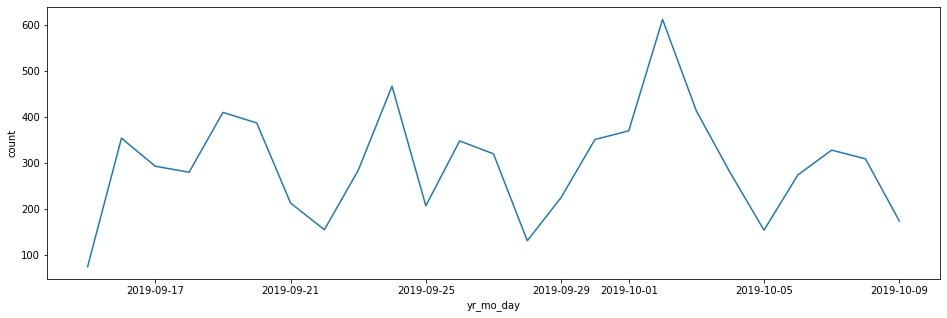

In [139]:
fig = plt.figure(figsize=(16, 5))
sns.lineplot(x="yr_mo_day", y="count", data=new_master_pseudo)

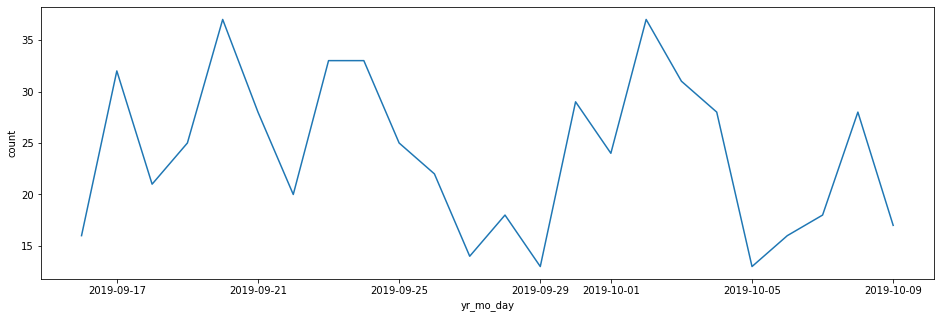

In [122]:
fig = plt.figure(figsize=(16, 5))
sns.lineplot(x="yr_mo_day", y="count", data=new_master_pseudo)

In [140]:
csv_string = new_master_pseudo.to_csv('updated_views.csv', index=False)

In [102]:
import chart_studio.plotly as py
import plotly.graph_objs as go

In [103]:
data = [go.Scatter(x=new_master_pseudo['yr_mo_day'], y=new_master_pseudo['count'])]
py.iplot(data, filename='pandas/basic-line-plot')

PlotlyRequestError: Authentication credentials were not provided.

In [8]:
file1 = 'master_tables/master_views_table.csv'
old_master = pd.read_csv(file1)
old_master

,timestamp,collection_timestamp,count,day,mo,uniques,yr
0,2019-09-15T00:00:00Z,2019-09-29 10:06:32.933523,75,15,9,12,2019
1,2019-09-16T00:00:00Z,2019-09-29 10:06:32.933523,354,16,9,83,2019
2,2019-09-17T00:00:00Z,2019-09-29 10:06:32.933523,293,17,9,66,2019
3,2019-09-18T00:00:00Z,2019-09-29 10:06:32.933523,280,18,9,60,2019
4,2019-09-19T00:00:00Z,2019-09-29 10:06:32.933523,410,19,9,66,2019
5,2019-09-20T00:00:00Z,2019-09-29 10:06:32.933523,387,20,9,71,2019
6,2019-09-21T00:00:00Z,2019-09-29 10:06:32.933523,213,21,9,43,2019
7,2019-09-22T00:00:00Z,2019-09-29 10:06:32.933523,155,22,9,30,2019
8,2019-09-23T00:00:00Z,2019-09-29 10:06:32.933523,284,23,9,71,2019
9,2019-09-24T00:00:00Z,2019-09-29 10:06:32.933523,467,24,9,79,2019


In [11]:
new_master = old_master.append(df).groupby('timestamp', sort=True).agg('first')
new_master

,collection_timestamp,count,day,mo,uniques,yr
timestamp,,,,,,
2019-09-15T00:00:00Z,2019-09-29 10:06:32.933523,75,15,9,12,2019
2019-09-16T00:00:00Z,2019-09-29 10:06:32.933523,354,16,9,83,2019
2019-09-17T00:00:00Z,2019-09-29 10:06:32.933523,293,17,9,66,2019
2019-09-18T00:00:00Z,2019-09-29 10:06:32.933523,280,18,9,60,2019
2019-09-19T00:00:00Z,2019-09-29 10:06:32.933523,410,19,9,66,2019
2019-09-20T00:00:00Z,2019-09-29 10:06:32.933523,387,20,9,71,2019
2019-09-21T00:00:00Z,2019-09-29 10:06:32.933523,213,21,9,43,2019
2019-09-22T00:00:00Z,2019-09-29 10:06:32.933523,155,22,9,30,2019
2019-09-23T00:00:00Z,2019-09-29 10:06:32.933523,284,23,9,71,2019


In [12]:
master_csv_name = 'master_tables/master_views_table'
csv_string = df.reset_index().to_csv(master_csv_name + '.csv', index=False)

In [35]:
master_views_summary_dict = [{'collection_timestamp': str(today_dt), 'counts': counts, 'uniques': uniques}]
master_views_summary_df = pd.DataFrame(master_views_summary_dict)
master_csv_summary_name = 'master_tables/master_clones_summary'
csv_string = master_views_summary_df.to_csv(master_csv_summary_name + '.csv', index=False)

In [21]:
today_dt

datetime.datetime(2019, 9, 29, 10, 14, 33, 792382)

In [10]:
old_master_sum = pd.read_csv('master_tables/master_clones_summary.csv')
old_master_sum

,collection_timestamp,counts,uniques
0,2019-09-29 10:29:12.892671,337,212


In [13]:
new_master_sum_dict = [{'collection_timestamp': str(today_dt), 'counts': counts, 'uniques': uniques}]
new_master_sum = pd.DataFrame(new_master_sum_dict)
new_master_sum

,collection_timestamp,counts,uniques
0,2019-09-29 12:34:50.117068,337,212


In [14]:
new_master_sum = old_master_sum.append(new_master_sum)
new_master_sum = new_master_sum.groupby('collection_timestamp', sort=True).agg('first')
new_master_sum

,counts,uniques
collection_timestamp,,
2019-09-29 10:29:12.892671,337,212
2019-09-29 12:34:50.117068,337,212
